In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../../data/Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
X = df.drop('sales', axis=1)

In [6]:
y = df['sales']

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [10]:
poly_features = polynomial_converter.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [17]:
test_predictions = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
MAE = mean_absolute_error(y_test, test_predictions)

In [22]:
MSE = mean_squared_error(y_test, test_predictions)

In [23]:
RMSE = np.sqrt(MSE)

In [24]:
MAE

0.48967980448035886

In [25]:
RMSE

np.float64(0.6646431757269)

In [28]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)

    train_rmse_errors.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
    test_rmse_errors.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

In [30]:
test_rmse_errors

[np.float64(1.5161519375993877),
 np.float64(0.6646431757269),
 np.float64(0.5803286825219469),
 np.float64(0.5077742640851456),
 np.float64(2.575819395346124),
 np.float64(9.87141294832405),
 np.float64(41.33052000561568),
 np.float64(3108.590753416225),
 np.float64(12767.649350474843)]

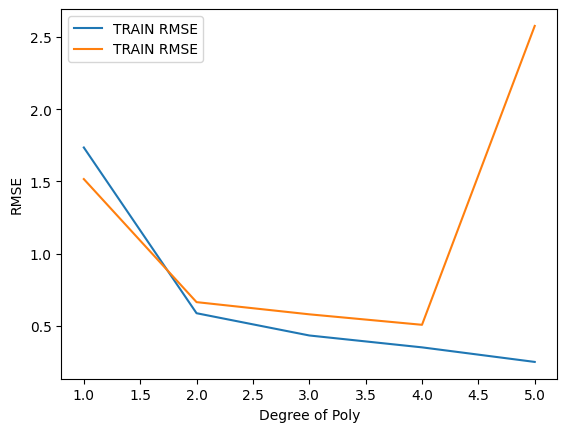

In [36]:
plt.plot(range(1,6), train_rmse_errors[:5], label='TRAIN RMSE')
plt.plot(range(1,6), test_rmse_errors[:5], label='TRAIN RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()

In [37]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [38]:
final_model = LinearRegression()

In [39]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [40]:
from joblib import dump, load

In [41]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [42]:
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

In [43]:
loaded_converter = load('final_converter.joblib')

In [44]:
loaded_model = load('final_poly_model.joblib')

In [45]:
campaign = [[149,22,12]]

In [47]:
transformed_data = loaded_converter.fit_transform(campaign)

In [48]:
loaded_model.predict(transformed_data)

array([14.64501014])